<a href="https://colab.research.google.com/github/FTCLuis/AlgoritmoAM/blob/main/Atv_Luis_Felipe_Laudacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Mineração de Dados**

### Nome: Luis Felipe Laudacio
### Data: 11/10/2024

---


### Tema da Base de Dados: Impacto das mudanças climáticas na agricultura

# **Importação dos Dados**

Importação das bibliotecas para a utilização do notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos mostrar o dataset agora.

In [2]:
df = pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


Vamos verificar agora se existe algum valor nulo na nossa base de dados.

In [3]:
df.isnull().sum()

,0
Year,0
Country,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0


Como não temos valores nulos no nosso dataset, não precisamos fazer um tratamento específico para esses possíveis valores.

In [9]:
df['Year'] = df['Year'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Crop_Type'] = df['Crop_Type'].astype('category')
df['Average_Temperature_C'] = pd.to_numeric(df['Average_Temperature_C'], errors='coerce')
df['Total_Precipitation_mm'] = pd.to_numeric(df['Total_Precipitation_mm'], errors='coerce')
df['CO2_Emissions_MT'] = pd.to_numeric(df['CO2_Emissions_MT'], errors='coerce')
df['Crop_Yield_MT_per_HA'] = pd.to_numeric(df['Crop_Yield_MT_per_HA'], errors='coerce')
df['Extreme_Weather_Events'] = pd.to_numeric(df['Extreme_Weather_Events'], errors='coerce')
df['Irrigation_Access_%'] = pd.to_numeric(df['Irrigation_Access_%'], errors='coerce')
df['Pesticide_Use_KG_per_HA'] = pd.to_numeric(df['Pesticide_Use_KG_per_HA'], errors='coerce')
df['Fertilizer_Use_KG_per_HA'] = pd.to_numeric(df['Fertilizer_Use_KG_per_HA'], errors='coerce')
df['Soil_Health_Index'] = pd.to_numeric(df['Soil_Health_Index'], errors='coerce')
df['Adaptation_Strategies'] = df['Adaptation_Strategies'].astype('category')
df['Economic_Impact_Million_USD'] = pd.to_numeric(df['Economic_Impact_Million_USD'], errors='coerce')

No nosso código acima, apenas estamos confirmando que todas as nossas colunas são realmente dos tipos de dados que ela deveriam ser, sendo categoricamente ou numeralmente.

In [10]:
df.describe()

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


Com o describe, vemos apenas as variáveis numéricas.

In [14]:
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [15]:
df['Year'].value_counts()

,count
Year,
1999,335
2019,317
1991,314
2012,313
2004,307
2013,305
1994,305
2001,300
1996,295


In [16]:
df['Country'].value_counts()

,count
Country,
Australia,1032
USA,1032
China,1031
Nigeria,1029
India,1025
Argentina,984
Canada,984
France,978
Russia,961


In [17]:
df['Region'].value_counts()

,count
Region,
South,754
Northeast,752
North,524
Central,466
Punjab,288
Victoria,283
New South Wales,276
East,273
South West,270


In [18]:
df['Crop_Type'].value_counts()

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


In [19]:
df['Adaptation_Strategies'].value_counts()

,count
Adaptation_Strategies,
Water Management,2049
No Adaptation,2024
Drought-resistant Crops,1995
Organic Farming,1975
Crop Rotation,1957


No código acima, estamos apenas contando quantos registros, e quais são os valores existentes com cada uma das colunas.

Separamos em trechos diferentes de código, pois caso deixássemos em apenas um bloco de código, o último trecho de código a ser executado substituiria todas as outras saídas.

# Visualização dos Dados

Vamos primeiro criar um histograma com base na coluna de temperatura média em C° dos locais analisados.

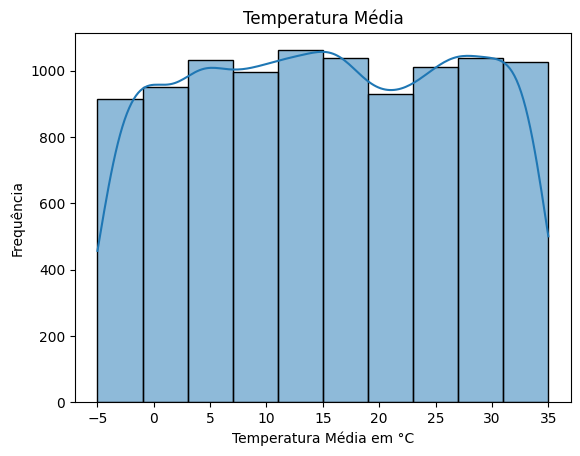

In [24]:
sns.histplot(df['Average_Temperature_C'], bins=10, kde=True)
plt.title('Temperatura Média')
plt.xlabel('Temperatura Média em °C')
plt.ylabel('Frequência')
plt.show()

Percebemos que a temperatura de `10°C` a `15°C` é o que mais aparece nos dados, com um pouco mais de 1000 registros.

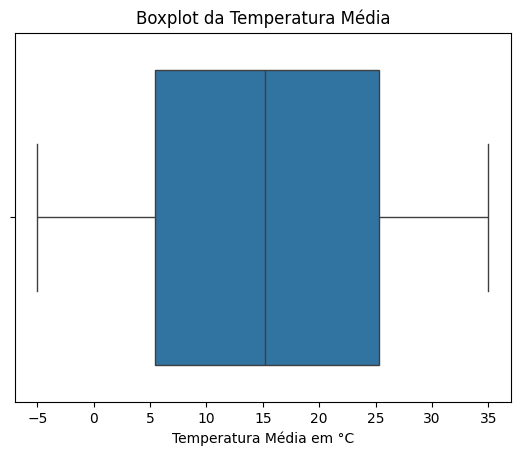

In [25]:
sns.boxplot(x=df['Average_Temperature_C'])
plt.title('Boxplot da Temperatura Média')
plt.xlabel('Temperatura Média em °C')
plt.show()

Vemos que os dados estão concentrados entre `5°C` a `25°C`, tendo uma dispersão que varia de `-5°C` a `5°C`, e de `25°C` a `35°C`.

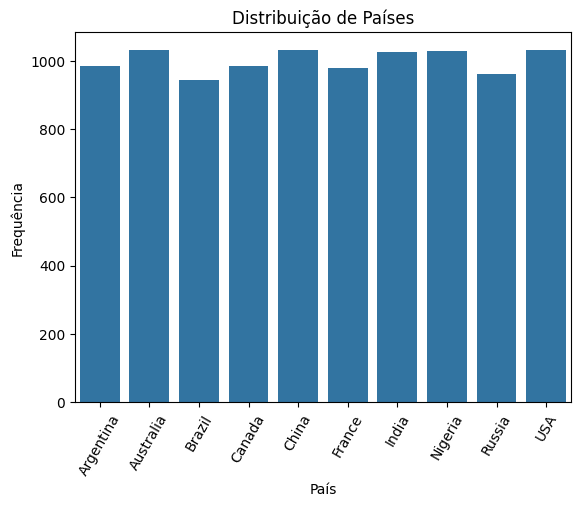

In [29]:
sns.countplot(x='Country', data=df)
plt.title('Distribuição de Países')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.xticks(rotation=60)
plt.show()

Aqui estamos contando apenas a frequência com que os países aparecem na nossa base de dados.

Vemos que **Australia**, **Estados Unidos**, **China**, **Nigéria** e **Índia** são os que mais aparecem na base.

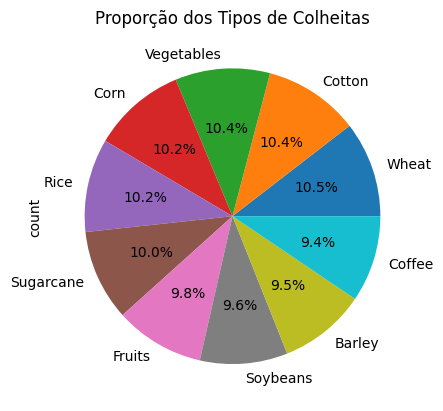

In [33]:
df['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção dos Tipos de Colheitas')
plt.show()